In [134]:
import pandas as pd
import numpy as np
from sklearn import (linear_model,
                     metrics,
                     preprocessing,
                     model_selection)
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
%matplotlib inline
plt.style.use('seaborn-v0_8')

In [136]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_data = pd.read_csv('data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [137]:
boston_data.isnull().sum().sum()

0

In [138]:
boston_data[boston_data.duplicated()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [139]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [140]:
# Вычисляем корелляции с целевым признаком.
corr_with_target = boston_data.corr()['MEDV'].abs().sort_values(ascending=False)
corr_with_target = corr_with_target.drop('MEDV')

<BarContainer object of 13 artists>

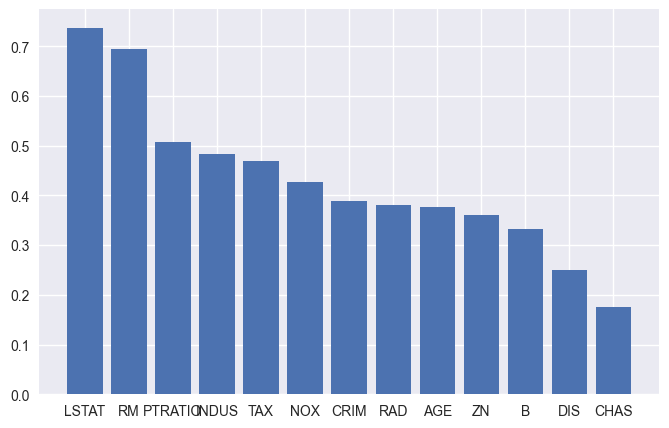

In [141]:
fig = plt.figure(figsize=(8, 5))
plt.bar(corr_with_target.index, corr_with_target.values)

In [142]:
X = boston_data[['LSTAT']]
y = boston_data['MEDV']
X.head()

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33


In [143]:
def linear_regression(X, y):
    # Создаем вектор из единиц.
    ones = np.ones(X.shape[0])
    # Добавляем его первым столбцом.
    X = np.column_stack([ones, X])
    # Вычиляем обратную матрицу.
    Q = np.linalg.inv(X.T @ X)
    # Вычисляем вектор коэффициетнов.
    w = Q @ X.T @ y
    return w

In [144]:
# Вычисляем параметры линейной регрессии.
w = linear_regression(X, y)
print(f'Vector w: {w}')
print(f'w0: {w[0]:.2f}')
print(f'w1: {w[1]:.2f}')

Vector w: [34.55384088 -0.95004935]
w0: 34.55
w1: -0.95


In [145]:
x_example = 5.18
y_predict = w[0] + w[1] * x_example
print(f'Predicted value: {y_predict:.2f}')

Predicted value: 29.63


In [146]:
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(8, 4)) #фигура + координатная плоскость
    ax.scatter(X, y_true, alpha=0.7, label='Sample data') #диаграмма рассеяния
    ax.plot(X, y_predict, color='black', label='Regression model') #линейный график
    ax.set_xlabel(xlabel) #название оси абсцисс
    ax.set_ylabel(ylabel) #название оси ординат
    ax.legend(facecolor='white', fontsize=11) #легенда

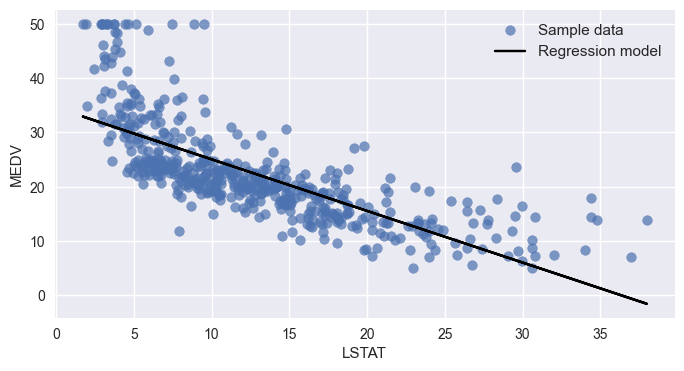

In [147]:
y_pred = w[0] + w[1] * X
plot_regression_2d(X, y, y_pred)

In [148]:
lin_reg_model = linear_model.LinearRegression()
lin_reg_model.fit(X, y)
print(lin_reg_model.intercept_)
print(lin_reg_model.coef_)

34.5538408793831
[-0.95004935]


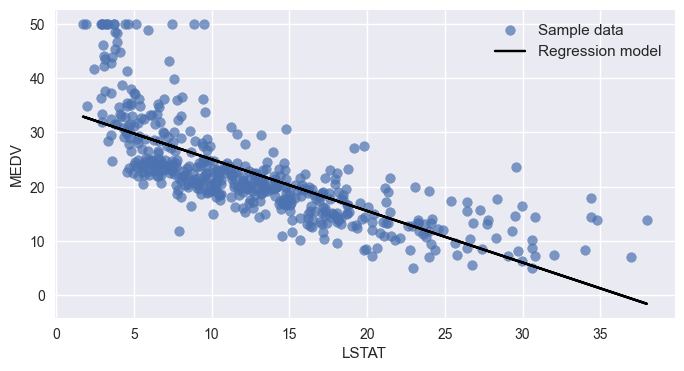

In [149]:
y_pred_train = lin_reg_model.predict(X)
plot_regression_2d(X, y, y_pred_train)

In [150]:
X = boston_data.drop('MEDV', axis=1)
y = boston_data['MEDV']
lm = linear_model.LinearRegression()
lm.fit(X, y)
y_pred_last = lm.predict(X)

In [151]:
print('MAE : {:.2f}'.format(metrics.mean_absolute_error(y, y_pred_train)))
print('MAPE : {:.2f}'.format(metrics.mean_absolute_percentage_error(y, y_pred_train) * 100))
print('MSE : {:.2f}'.format(metrics.mean_squared_error(y, y_pred_train)))
print('RMSE : {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y, y_pred_train))))
print('R2 : {:.2f}'.format(metrics.r2_score(y, y_pred_train)))

MAE : 4.51
MAPE : 21.35
MSE : 38.48
RMSE : 6.20
R2 : 0.54


In [152]:
print('MAE : {:.2f}'.format(metrics.mean_absolute_error(y, y_pred_last)))
print('MAPE : {:.2f}'.format(metrics.mean_absolute_percentage_error(y, y_pred_last) * 100))
print('MSE : {:.2f}'.format(metrics.mean_squared_error(y, y_pred_last)))
print('RMSE : {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y, y_pred_last))))
print('R2 : {:.2f}'.format(metrics.r2_score(y, y_pred_last)))

MAE : 3.27
MAPE : 16.42
MSE : 21.89
RMSE : 4.68
R2 : 0.74


In [153]:
features = boston_data.drop('MEDV', axis=1).columns

In [154]:
w_data = pd.DataFrame({'Features' : features, 'Coef' : lm.coef_})
in_data = pd.DataFrame({'Features' : ['Intercepr'], 'Coef': lm.intercept_})
df = pd.concat([w_data, in_data])
df

,Features,Coef
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


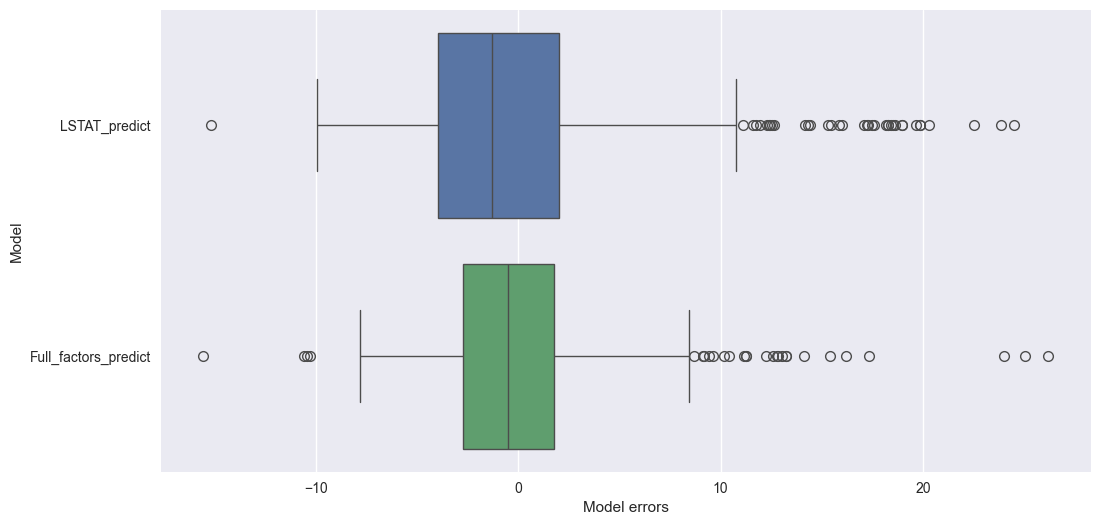

In [155]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура + координатная плоскость
#Ошибки модели на одном факторе LSTAT
y_errors_lstat = y - lin_reg_model.predict(boston_data[['LSTAT']])
#Ошибки модели на всех факторах
y_errors_full = y - lm.predict(boston_data[features])
#Для удобства визуализации составим DataFrame из ошибок
errors_df = pd.DataFrame(
    {'LSTAT_predict': y_errors_lstat, 
     'Full_factors_predict': y_errors_full
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=errors_df, orient='h', ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

In [156]:
X = boston_data[['LSTAT']]
y = boston_data['MEDV']

In [157]:
sgd_lr_lstat = linear_model.SGDRegressor(random_state=42)
sgd_lr_lstat.fit(X, y)

SGDRegressor(random_state=42)

In [158]:
print(f'w0 : {sgd_lr_lstat.intercept_}')
print(f'w1 : {sgd_lr_lstat.coef_}')

w0 : [34.33010969]
w1 : [-0.96193242]


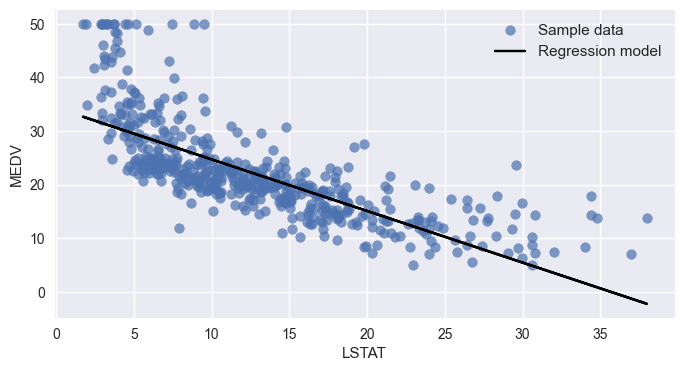

In [159]:
y_predict = sgd_lr_lstat.predict(X)
plot_regression_2d(X, y, y_predict)

In [160]:
print('R2 : {:.2f}'.format(metrics.r2_score(y, y_predict)))

R2 : 0.54


In [161]:
features = boston_data.drop('MEDV', axis=1).columns

X = boston_data[features]
y = boston_data['MEDV']

sgd_lr_full = linear_model.SGDRegressor(random_state=42)
sgd_lr_full.fit(X, y)

#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})
#Составляем строчку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,2.156857e+11
1,ZN,1.248446e+10
2,INDUS,7.277644e+09
3,CHAS,8.306154e+09
4,NOX,-8.413828e+09
5,RM,-3.148182e+10
6,AGE,8.685820e+10
7,DIS,-2.256141e+11
8,RAD,-4.683208e+10
9,TAX,1.892286e+09


In [162]:
y_predict = sgd_lr_full.predict(X)
print('R2 : {:.2f}'.format(metrics.r2_score(y, y_predict)))

R2 : -10590303862129979358707712.00


In [163]:
ss = preprocessing.StandardScaler()
X_scaled = ss.fit_transform(X)
df = pd.DataFrame(X_scaled, columns=features)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [164]:
sgd_lr_full.fit(X_scaled, y)

#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})
#Составляем строчку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,-0.870552
1,ZN,0.947112
2,INDUS,-0.116802
3,CHAS,0.730289
4,NOX,-1.894276
5,RM,2.757578
6,AGE,-0.027846
7,DIS,-3.049237
8,RAD,1.957066
9,TAX,-1.305271


In [165]:
y_predict = sgd_lr_full.predict(X_scaled)
print('R2 : {:.2f}'.format(metrics.r2_score(y, y_predict)))

R2 : 0.74


In [166]:
sgd_lr_bad = linear_model.SGDRegressor(
    learning_rate='constant',
    eta0=0.1, 
    random_state=42
)
sgd_lr_bad.fit(X_scaled, y)
y_predict = sgd_lr_bad.predict(X_scaled)
print('R2 : {:.2f}'.format(metrics.r2_score(y, y_predict)))

R2 : -335415038359.63


In [167]:
sgd_lr_bad2 = linear_model.SGDRegressor(
    learning_rate='constant',
    eta0=1e-6, 
    random_state=42
)
sgd_lr_bad2.fit(X_scaled, y)
y_predict = sgd_lr_bad2.predict(X_scaled)
print('R2 : {:.2f}'.format(metrics.r2_score(y, y_predict)))

In [168]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.3, random_state=42)
print('Train :', X_train.shape, y_train.shape)
print('Test :', X_test.shape, y_test.shape)

Train : (354, 13) (354,)
Test : (152, 13) (152,)


In [169]:
lin_model = linear_model.LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_train = lin_model.predict(X_train)
y_pred_test = lin_model.predict(X_test)
print('R2 train: {:.2f}'.format(metrics.r2_score(y_train, y_pred_train)))
print('R2 test: {:.2f}'.format(metrics.r2_score(y_test, y_pred_test)))

R2 train: 0.74
R2 test: 0.71


In [170]:
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)
print(X_train_poly.shape)
print(X_test_poly.shape)

(354, 104)
(152, 104)


In [171]:
lin_model_poly = linear_model.LinearRegression()
lin_model_poly.fit(X_train_poly, y_train)
y_pred_train_poly = lin_model_poly.predict(X_train_poly)
y_pred_test_poly = lin_model_poly.predict(X_test_poly)
print('R2 train: {:.2f}'.format(metrics.r2_score(y_train, y_pred_train_poly)))
print('R2 test: {:.2f}'.format(metrics.r2_score(y_test, y_pred_test_poly)))

R2 train: 0.95
R2 test: 0.66


In [172]:
features = boston_data.drop('MEDV', axis=1).columns

X = boston_data[features]
y = boston_data['MEDV']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.3, random_state=42)

In [173]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaler)
X_train_scaler_poly = poly.transform(X_train_scaler)
X_test_scaler_poly = poly.transform(X_test_scaler)

print(X_train_scaler_poly.shape, X_test_scaler_poly.shape)

(354, 104) (152, 104)


In [174]:
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train_scaler_poly, y_train)
y_pred_train_scal_poly = lasso.predict(X_train_scaler_poly)
y_pred_test_scal_poly = lasso.predict(X_test_scaler_poly)
print('R2 train: {:.2f}'.format(metrics.r2_score(y_train, y_pred_train_scal_poly)))
print('R2 test: {:.2f}'.format(metrics.r2_score(y_test, y_pred_test_scal_poly)))

R2 train: 0.74
R2 test: 0.72


In [175]:
print(np.round(lasso.coef_, 3))

[ -0.      0.     -0.      0.611  -0.      0.     -0.     -0.564  -0.
  -0.     -5.285   0.    -16.69   -0.      0.     -0.      0.     -0.
  -0.     -0.     -0.     -0.     -0.     -0.     -0.     -0.      0.
  -0.      0.      0.      0.      0.     -0.     -0.     -0.     -0.
   0.     -0.      0.      0.     -0.     -0.     -0.     -0.     -0.
  -0.     -0.      0.     -0.      1.937   0.      0.      0.      0.
   0.097   0.      0.      0.     -0.     -0.     -0.     -0.     -0.
  -0.     -0.     -0.      0.     -0.     17.67   -0.     -0.     -0.
  -2.474  -0.      6.088  -0.     -0.     -0.     -0.     -0.     -0.202
   0.     -0.973  -0.     -0.     -0.     -0.     -0.     -0.     -0.
  -0.     -0.      0.     -0.428  -0.     -0.      0.     -0.     -0.
  -0.     -0.      0.     -0.      0.   ]


In [176]:
ridge = linear_model.Ridge(alpha=10)
ridge.fit(X_train_scaler_poly, y_train)
y_pred_train_scal_poly = ridge.predict(X_train_scaler_poly)
y_pred_test_scal_poly = ridge.predict(X_test_scaler_poly)
print('R2 train: {:.2f}'.format(metrics.r2_score(y_train, y_pred_train_scal_poly)))
print('R2 test: {:.2f}'.format(metrics.r2_score(y_test, y_pred_test_scal_poly)))

R2 train: 0.76
R2 test: 0.74


In [177]:
print(np.round(ridge.coef_, 3))

[-8.850e-01  4.880e-01 -4.910e-01  5.980e-01 -6.930e-01  4.602e+00
 -4.000e-01 -2.304e+00  8.980e-01 -7.480e-01 -1.973e+00  1.170e+00
 -4.235e+00 -7.740e-01  4.000e-03 -5.660e-01  2.500e-01 -6.490e-01
 -7.420e-01 -7.920e-01 -7.400e-02 -9.140e-01 -8.290e-01 -7.370e-01
 -6.950e-01 -5.220e-01  7.730e-01 -1.630e-01  7.130e-01  3.240e-01
  1.571e+00 -3.500e-02 -2.690e-01 -6.000e-03 -1.450e-01 -1.090e-01
  5.080e-01 -5.110e-01  7.700e-01  6.000e-01 -7.830e-01 -4.900e-01
  2.520e-01 -9.300e-01  3.080e-01  5.300e-01 -4.500e-01  2.740e-01
 -1.554e+00  5.980e-01 -6.630e-01  8.070e-01  5.500e-01 -2.030e-01
  1.531e+00  1.437e+00  4.110e-01  6.200e-01 -1.310e+00 -1.658e+00
  1.390e-01 -7.390e-01 -5.580e-01 -5.540e-01 -9.170e-01 -1.339e+00
  8.800e-02 -1.835e+00  7.279e+00  1.484e+00  5.950e-01 -1.346e+00
 -1.605e+00 -9.430e-01  5.464e+00 -3.015e+00  6.210e-01 -1.897e+00
  8.010e-01 -8.600e-02 -1.964e+00  3.850e-01 -3.257e+00 -9.720e-01
 -5.380e-01 -1.192e+00 -1.344e+00 -2.148e+00 -1.321e+00  5.460

In [178]:
#Создаём список из 20 возможных значений от 0.001 до 1
alpha_list = np.linspace(0.001, 1, 20)
#Создаём пустые списки, в которые будем добавлять результаты 
train_scores = []
test_scores = []
for alpha in alpha_list:
    #Создаём объект класса линейной регрессии с L1-регуляризацией
    lasso_lr_poly = linear_model.Lasso(alpha=alpha, max_iter=10000)
    #Обучаем модель
    lasso_lr_poly.fit(X_train_scaler_poly, y_train)
    #Делаем предсказание для тренировочной выборки
    y_train_predict_poly = lasso_lr_poly.predict(X_train_scaler_poly)
    #Делаем предсказание для тестовой выборки
    y_test_predict_poly = lasso_lr_poly.predict(X_test_scaler_poly)
    #Рассчитываем коэффициенты детерминации для двух выборок и добавляем их в списки
    train_scores.append(metrics.r2_score(y_train, y_train_predict_poly))
    test_scores.append(metrics.r2_score(y_test, y_test_predict_poly))

c:\Users\arkad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.241e+01, tolerance: 3.112e+00
  model = cd_fast.enet_coordinate_descent(


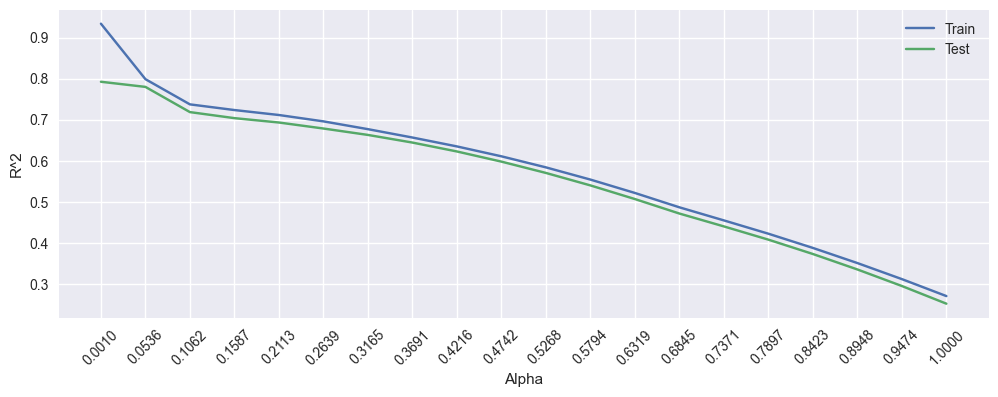

In [179]:
fig, ax = plt.subplots(figsize=(12, 4)) #фигура + координатная плоскость
ax.plot(alpha_list, train_scores, label='Train') #линейный график для тренировочной выборки
ax.plot(alpha_list, test_scores, label='Test') #линейный график для тестовой выборки
ax.set_xlabel('Alpha') #название оси абсцисс
ax.set_ylabel('R^2') #название оси ординат
ax.set_xticks(alpha_list) #метки по оси абсцисс
ax.xaxis.set_tick_params(rotation=45) #поворот меток на оси абсцисс
ax.legend(); #отображение легенды

In [181]:
#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(alpha=0.3)
#Обучаем модель 
lasso_lr_poly.fit(X_train_scaler_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaler_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaler_poly)
#Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.683
Test R^2: 0.668
